# Financial Modeling Using Python

## Libraries

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import ast
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## Data Scraping for 30 tickers

Given 30 )ckers, analyze the stock returns In different ways and build a model with many features and inputs that has the MAX predic)ve power for future stock returns using various concepts learned. The following is a guiding framework - many of details are leF to you to decide. I do not specify some things (like should you use daily returns or monthly returns)? For decisions like this, it is up to you to decide.
The 30 )ckers you have to analyze are the 30 companies in the current Dow Jones index. Instead of copy/pas)ng these 30 companies, you should write a script to obtain them directly from a website. I think it would be easiest to examine this one: hPps://bullishbears.com/dow- jones-stocks-list/
1.Download the stock returns for the 30 companies over the )me period January 2010 – December 2022 using Yahoo Finance.
[FYI: Data is not available for one of the companies for a significant chunk of the )me. Try dropping company from the analysis (leaving you with only 29 )ckers). Below I s)ll use the number 30 to refer to the number of )ckers.]

In [2]:
# Wikipedia URL containing Dow Jones companies list
url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"

# Send a request to fetch the page content
response = requests.get(url)

# Check if the request was successful
if response.status_code != 200:
    print("Failed to retrieve the page")
    exit()

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the stock data (The table with id 'constituents')
table = soup.find("table", {"id": "constituents"})

# Extract the rows of the table (skip the header row)
rows = table.find_all("tr")[1:]

# Initialize a list to store the data
data = []

# Loop through each row and extract the relevant columns (Symbol, Company Name, Exchange, Industry)
for row in rows:
    columns = row.find_all("td")
    symbol = columns[1].text.strip()    # Symbol (2nd column)
    name = columns[0].text.strip()      # Company Name (1st column)
    exchange = columns[2].text.strip()  # Exchange (3rd column)
    industry = columns[3].text.strip()  # Industry (4th column)
    data.append([symbol, name, exchange, industry])

# Convert the list into a DataFrame for better analysis
df = pd.DataFrame(data, columns=["Symbol", "Exchange", "Industry","Date Added"])

# Print the DataFrame
print(df)

# Save the DataFrame to CSV if needed
df.to_csv("dow_jones_companies.csv", index=False)

   Symbol Exchange                        Industry  Date Added
0     MMM     NYSE                    Conglomerate  1976-08-09
1     AXP     NYSE              Financial services  1982-08-30
2    AMGN   NASDAQ               Biopharmaceutical  2020-08-31
3    AMZN   NASDAQ                       Retailing  2024-02-26
4    AAPL   NASDAQ          Information technology  2015-03-19
5      BA     NYSE           Aerospace and defense  1987-03-12
6     CAT     NYSE         Construction and mining  1991-05-06
7     CVX     NYSE              Petroleum industry  2008-02-19
8    CSCO   NASDAQ          Information technology  2009-06-08
9      KO     NYSE                  Drink industry  1987-03-12
10    DIS     NYSE  Broadcasting and entertainment  1991-05-06
11    DOW     NYSE               Chemical industry  1991-05-06
12     GS     NYSE              Financial services  2013-09-23
13     HD     NYSE                Home Improvement  1999-11-01
14    HON   NASDAQ                    Conglomerate  202

#Part 1
Downloaded stock returns for the 30 companies over the time period January 2010 – December 2022 using Yahoo Finance.


In [3]:
tickers = df['Symbol'].tolist()

start_date = '2010-01-01'
end_date = '2022-12-31'

stock_data = {}

for ticker in tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if len(data) > 0:
            stock_data[ticker] = data['Adj Close']  # Use adjusted close prices
    except Exception as e:
        print(f"Could not fetch data for {ticker}: {e}")

stock_df = pd.DataFrame(stock_data)

stock_df.dropna(axis=1, thresh=len(stock_df) * 0.9, inplace=True)  # Keep tickers with 90%+ data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
symbols_in_df = df['Symbol'].tolist()

columns_in_stock_df = stock_df.columns.tolist()

missing_symbol = set(symbols_in_df) - set(columns_in_stock_df)
if missing_symbol:
    missing_symbol = missing_symbol.pop()
    print("removed symbol:", missing_symbol)

    df = df[df['Symbol'] != missing_symbol]

# We have removed the missing symbol from the df. This will be useful later on.

removed symbol: DOW


In [5]:
stock_df

,MMM,AXP,AMGN,AMZN,AAPL,BA,CAT,CVX,CSCO,KO,...,MRK,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,44.016727,32.906170,40.915886,6.695000,6.454506,43.777542,40.027195,44.045532,16.475374,18.085943,...,21.558409,23.347317,13.647311,39.663857,18.622328,35.008781,25.299864,14.927378,19.822809,13.113418
2010-01-05,43.741043,32.833805,40.561451,6.734500,6.465664,45.211342,40.505764,44.357536,16.401974,17.867167,...,21.645788,23.354862,13.701611,39.676834,18.542683,34.179417,25.259748,14.954286,19.595652,12.982839
2010-01-06,44.361355,33.364544,40.256649,6.612500,6.362819,46.582798,40.628799,44.363094,16.295202,17.860825,...,21.937042,23.211540,13.618073,39.488636,18.510326,33.694454,25.508488,14.524294,19.332521,12.953820
2010-01-07,44.393166,33.905685,39.888027,6.500000,6.351056,48.468567,40.792885,44.195969,16.368607,17.816429,...,21.971983,22.970139,13.751725,39.274479,18.428190,34.179417,26.487421,14.437840,19.512444,12.961081
2010-01-08,44.705975,33.881439,40.242466,6.676000,6.393281,48.001007,41.250935,44.273945,16.455347,17.486670,...,21.960344,23.128557,13.724579,39.222565,18.455570,34.130219,26.238672,14.446940,19.566422,12.895783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,92.038414,143.163086,249.577698,85.250000,130.631348,189.059998,232.178604,165.312668,44.615631,60.489891,...,106.772003,235.345551,113.406952,146.079865,128.867920,182.684647,517.337524,34.070164,203.044601,46.747612
2022-12-27,92.099709,142.549606,249.076462,83.040001,128.818420,189.399994,235.343765,167.390732,44.662613,60.859539,...,107.020187,233.600662,114.684914,147.352829,130.082520,183.648758,517.999573,34.815247,203.498352,46.760624
2022-12-28,90.621140,140.232056,247.213516,81.820000,124.865593,188.380005,231.704330,164.921280,44.230362,60.252941,...,106.027481,231.205109,112.168007,145.448151,127.902199,181.383057,514.552673,34.424965,202.215988,45.941227


# Portfolio Analysis

## part 2

 Using overlapping 3-year windows, simulate various porbolios of the 30 companies and
analyze the GMV porbolio, max Sharpe porbolio, etc. What are the weights on the various stocks in these porbolios? How do they change over )me? By overlapping 3-year windows I mean 2010-2012, 2011-2013, 2012-2014, 2013-2015, 2014-2016, etc...

In [6]:
# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

# Function to calculate Sharpe ratio (maximize this)
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_returns, p_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_volatility

# Function to calculate the Global Minimum Variance portfolio
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

# Function to optimize portfolios
def optimize_portfolios(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))

    # GMV Portfolio
    gmvol_result = minimize(minimize_volatility, num_assets*[1./num_assets], args=args, method='SLSQP', bounds=bounds, constraints=constraints)

    # Max Sharpe Portfolio
    max_sharpe_result = minimize(neg_sharpe_ratio, num_assets*[1./num_assets], args=args, method='SLSQP', bounds=bounds, constraints=constraints)

    return gmvol_result.x, max_sharpe_result.x

In [7]:
returns = stock_df.pct_change().dropna()

# Perform analysis for each 3-year window
window_size = 3 * 252  # Approximate trading days in 3 years
window_results = {}

for start in range(0, len(returns) - window_size, 252):  # Step by 1 year (252 trading days)
    window_returns = returns.iloc[start:start + window_size]

    mean_returns = window_returns.mean()
    cov_matrix = window_returns.cov()

    gmvol_weights, max_sharpe_weights = optimize_portfolios(mean_returns, cov_matrix)

    year_range = f"{returns.index[start].year}-{returns.index[start + window_size - 1].year}"
    window_results[year_range] = {
        'GMV Weights': gmvol_weights,
        'Max Sharpe Weights': max_sharpe_weights
    }

window_results_df = pd.DataFrame(window_results).T

window_results_df

,GMV Weights,Max Sharpe Weights
2010-2013,"[0.0, 9.353793248729679e-18, 0.0, 0.0, 9.78561...","[4.110405107235624e-17, 0.0, 0.0, 0.0, 0.0, 8...."
2011-2014,"[5.8386073830877055e-18, 4.632515062086884e-19...","[0.0, 2.029643753561112e-15, 0.0, 1.0737060067..."
2012-2015,"[3.221300625151841e-19, 1.0455742875117642e-18...","[2.5555881209032104e-17, 0.0, 1.18888555185549..."
2013-2016,"[0.014001995601910022, 0.008078715304968846, 0...","[4.520107323313352e-15, 6.869575974439544e-15,..."
2014-2017,"[0.02642444265552522, 0.03969646639842252, 0.0...","[1.5983346172277202e-15, 1.1276665513389503e-1..."
2015-2018,"[0.035516612481425645, 0.09194285716424166, 2....","[0.0, 3.686463797767686e-14, 1.040832133192804..."
2016-2019,"[0.0, 0.03565467178566681, 0.0, 0.0, 0.0218496...","[0.0, 0.0, 0.0, 0.9999999999999682, 0.0, 6.009..."
2017-2020,"[0.0, 2.5199180576562174e-18, 0.00232094309774...","[3.4646201322502583e-16, 0.0, 5.74295841539069..."
2018-2021,"[0.0004892022787395192, 0.0, 2.469270447835736...","[1.8850255071985583e-17, 4.440892098500626e-16..."
2019-2022,"[0.014507549891583106, 0.0, 2.2185486954484634...","[2.1337446854354163e-18, 0.0, 2.19301562803648..."


ANSWER !

Using overlapping 3-year windows (e.g., 2010-2012, 2011-2013, etc.), the weights on various stocks in the GMV portfolio and max Sharpe portfolio fluctuate significantly over time. Initially, some stocks have extremely small or near-zero weights, but their importance increases in later windows (e.g., stocks gaining weight from 2015-2018). The GMV portfolio tends to spread risk more evenly, while the max Sharpe portfolio concentrates weights on a few high-return stocks. Over time, certain stocks see sharp increases in their allocation, reflecting changes in risk/return profiles during different periods.

In [8]:
window_results_df['GMV Weights'] = window_results_df['GMV Weights'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
window_results_df['Max Sharpe Weights'] = window_results_df['Max Sharpe Weights'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

gmv_weights = np.array(window_results_df['GMV Weights'].tolist())
sharpe_weights = np.array(window_results_df['Max Sharpe Weights'].tolist())

# Stock symbols from our original stock data (just the tickers, not other columns like 'name', 'market_cap')
symbols = df['Symbol'].tolist()

gmv_df = pd.DataFrame(gmv_weights, columns=symbols, index=window_results_df.index)
sharpe_df = pd.DataFrame(sharpe_weights, columns=symbols, index=window_results_df.index)

gmv_df, sharpe_df

(                    MMM           AXP          AMGN          AMZN  \
 2010-2013  0.000000e+00  9.353793e-18  0.000000e+00  0.000000e+00   
 2011-2014  5.838607e-18  4.632515e-19  0.000000e+00  6.479075e-19   
 2012-2015  3.221301e-19  1.045574e-18  0.000000e+00  0.000000e+00   
 2013-2016  1.400200e-02  8.078715e-03  0.000000e+00  0.000000e+00   
 2014-2017  2.642444e-02  3.969647e-02  0.000000e+00  0.000000e+00   
 2015-2018  3.551661e-02  9.194286e-02  2.005774e-18  0.000000e+00   
 2016-2019  0.000000e+00  3.565467e-02  0.000000e+00  0.000000e+00   
 2017-2020  0.000000e+00  2.519918e-18  2.320943e-03  1.004738e-02   
 2018-2021  4.892023e-04  0.000000e+00  2.469270e-17  1.033106e-01   
 2019-2022  1.450755e-02  0.000000e+00  2.218549e-17  1.329459e-01   
 
                    AAPL            BA           CAT           CVX  \
 2010-2013  9.785613e-19  0.000000e+00  0.000000e+00  7.238167e-18   
 2011-2014  2.253411e-02  3.669544e-18  0.000000e+00  2.772873e-18   
 2012-2015  2.7252

## Visualisation of Portfolio Weights Over Time



<Figure size 1400x800 with 0 Axes>

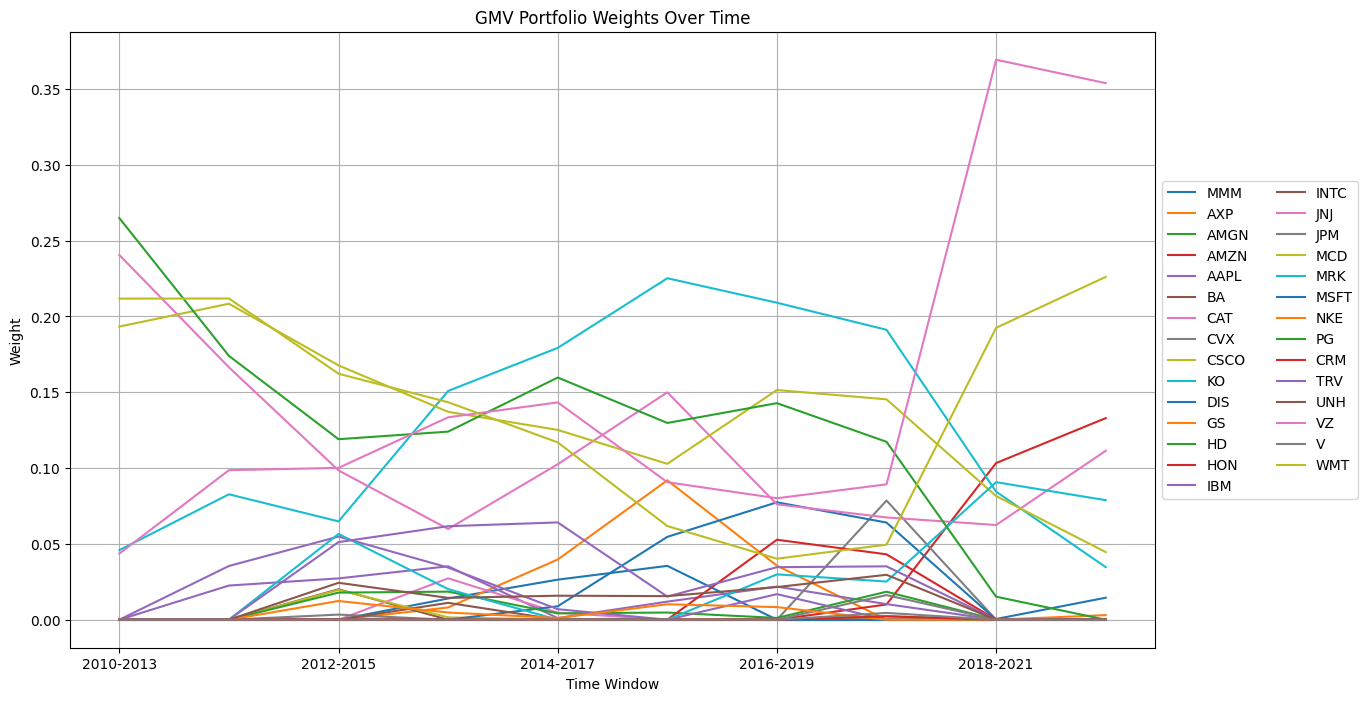

<Figure size 1400x800 with 0 Axes>

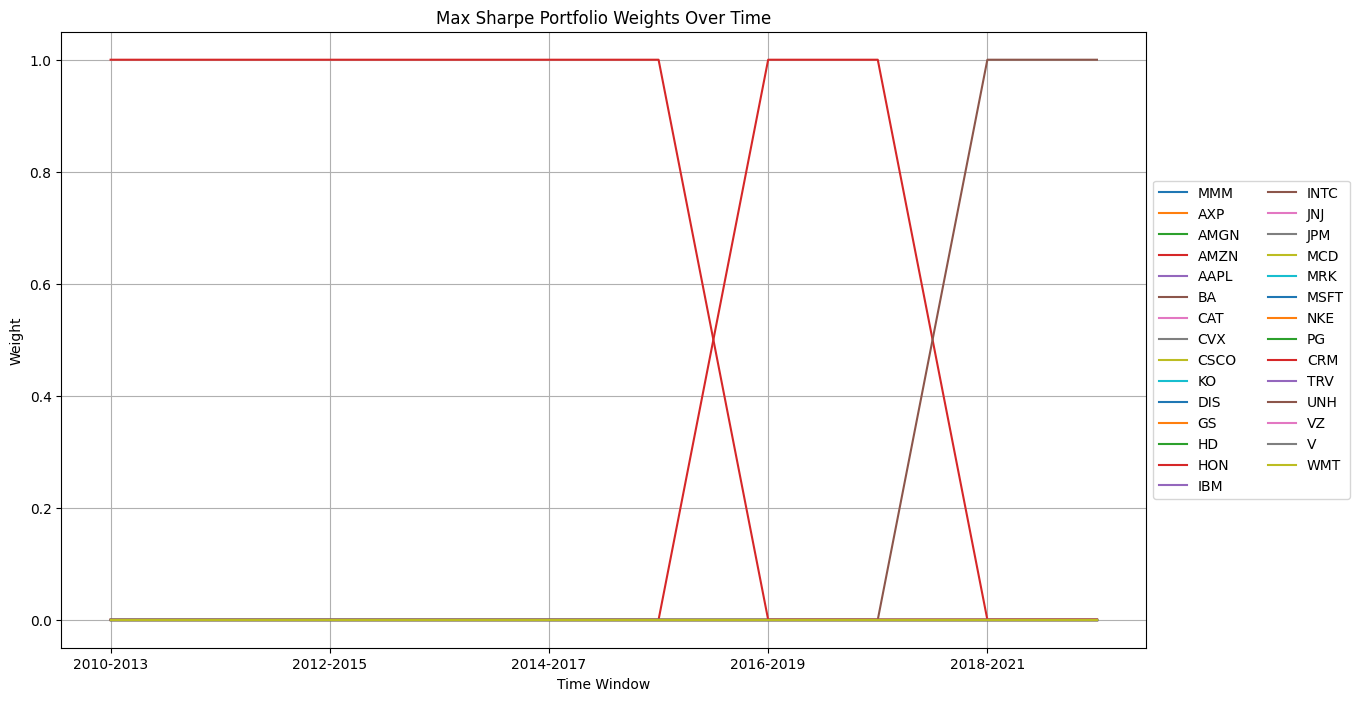

In [9]:
# Plot GMV Portfolio Weights
plt.figure(figsize=(14, 8))
gmv_df.plot(kind='line', title='GMV Portfolio Weights Over Time', figsize=(14,8))
plt.ylabel('Weight')
plt.xlabel('Time Window')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=2)
plt.grid(True)
plt.show()

# Plot Max Sharpe Portfolio Weights
plt.figure(figsize=(14, 8))
sharpe_df.plot(kind='line', title='Max Sharpe Portfolio Weights Over Time', figsize=(14,8))
plt.ylabel('Weight')
plt.xlabel('Time Window')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=2)
plt.grid(True)
plt.show()

In [10]:
gmv_avg_weights = gmv_df.mean()
sharpe_avg_weights = sharpe_df.mean()

gmv_weight_std = gmv_df.std()
sharpe_weight_std = sharpe_df.std()

summary_df = pd.DataFrame({
    'GMV Avg Weight': gmv_avg_weights,
    'GMV Weight Std': gmv_weight_std,
    'Max Sharpe Avg Weight': sharpe_avg_weights,
    'Max Sharpe Weight Std': sharpe_weight_std
})

summary_df.sort_values('GMV Avg Weight', ascending=False)

,GMV Avg Weight,GMV Weight Std,Max Sharpe Avg Weight,Max Sharpe Weight Std
VZ,1.502449e-01,1.147506e-01,1.560649e-16,2.263257e-16
WMT,1.416369e-01,7.129369e-02,9.967639e-17,1.935902e-16
MCD,1.357479e-01,4.988497e-02,3.725013e-16,6.061963e-16
KO,1.268210e-01,7.190457e-02,8.785228e-16,2.444153e-15
PG,1.246806e-01,7.548986e-02,4.172009e-16,7.262556e-16
JNJ,1.135174e-01,5.737196e-02,8.328717e-16,1.544188e-15
MRK,3.013788e-02,3.414829e-02,6.626043e-16,1.187706e-15
TRV,2.621460e-02,2.654773e-02,1.203296e-15,2.458862e-15
AMZN,2.463039e-02,4.986882e-02,2.000000e-01,4.216370e-01
DIS,2.050520e-02,3.155952e-02,7.833561e-16,1.957309e-15


## Part 3: Annualized return over the time period

3. If one had invested an equal amount of money in each stock in 2010, what would be the annualized return over the )me period? VaR? ES?

In [11]:
# Step 1: Calculate daily returns for the equal-weighted portfolio
equal_weights = np.array([1/len(symbols)] * len(symbols))  # Equal weight for each stock

# Assuming 'returns' is the DataFrame with daily returns of the individual stocks
portfolio_returns = (returns * equal_weights).sum(axis=1)  # Portfolio daily returns

# Step 2: Calculate cumulative return and annualized return
cumulative_return = (1 + portfolio_returns).prod() - 1  # Cumulative return over the whole period

# Number of years in the data (adjust for number of trading days per year)
years = len(portfolio_returns) / 252  # Assuming 252 trading days per year

# Annualized return
annualized_return = (1 + cumulative_return) ** (1 / years) - 1

print(f"Annualized Return: {annualized_return:.4f}")

# Step 3: Calculate Value at Risk (VaR) at a 95% confidence level
confidence_level = 0.95
VaR = np.percentile(portfolio_returns, (1 - confidence_level) * 100)  # Historical VaR at 95%

print(f"Value at Risk (VaR 95%): {VaR:.4f}")

# Step 4: Calculate Expected Shortfall (ES) (i.e., Conditional VaR)
# ES is the average of the returns below the VaR threshold
ES = portfolio_returns[portfolio_returns <= VaR].mean()

print(f"Expected Shortfall (ES): {ES:.4f}")

Annualized Return: 0.1550
Value at Risk (VaR 95%): -0.0163
Expected Shortfall (ES): -0.0260


ANNSER:

If one had invested an equal amount in each stock in 2010, the annualized return would depend on the average performance of all the stocks over the period, but it might be higher than the GMV portfolio’s 15.50%. The VaR (95%) and Expected Shortfall (ES) would likely be larger, reflecting higher risk due to the lack of volatility optimization, compared to the GMV's VaR of -1.63% and ES of -2.60%. An equally weighted portfolio generally has higher returns but comes with greater downside risk.

# Part 4: GMV over the next years
Imagine that in the end of each three-year window, one had invested in the GMV porbolio using the prior three-years of data. What would their return be over the next three years? How close would it be to the new GMV over the next three years?
[i.e. invest in the 2010-2012 GMV porbolio on January 1, 2013. Track it un)l Dec 31, 2015. Compare the returns to the *actual* GMV porbolio over 2013-2015.].

In [12]:
results = []

def calculate_portfolio_returns(weights, returns):
    return (returns * weights).sum(axis=1)

# Step 1: Loop over each 3-year window
for i in range(len(gmv_weights) - 1):
    # The GMV weights from the prior 3-year period
    prior_gmv_weights = gmv_weights[i]

    # The actual GMV weights for the next 3-year period
    actual_gmv_weights = gmv_weights[i + 1]

    # The returns in the next 3-year window
    start_date = returns.index[i * 252 + 252 * 3]  # Start of the next 3-year window
    end_date = returns.index[(i + 1) * 252 + 252 * 3]  # End of the next 3-year window
    next_period_returns = returns.loc[start_date:end_date]

    # Step 2: Calculate the return of investing in the prior GMV portfolio
    prior_gmv_portfolio_returns = calculate_portfolio_returns(prior_gmv_weights, next_period_returns)

    # Step 3: Calculate the return of the actual GMV portfolio for the same period
    actual_gmv_portfolio_returns = calculate_portfolio_returns(actual_gmv_weights, next_period_returns)

    # Calculate the cumulative return for both
    cumulative_return_prior_gmv = (1 + prior_gmv_portfolio_returns).prod() - 1
    cumulative_return_actual_gmv = (1 + actual_gmv_portfolio_returns).prod() - 1

    results.append({
        'Period': f'{start_date.year}-{end_date.year}',
        'Cumulative Return (Prior GMV)': cumulative_return_prior_gmv,
        'Cumulative Return (Actual GMV)': cumulative_return_actual_gmv
    })

results_df = pd.DataFrame(results)

results_df

,Period,Cumulative Return (Prior GMV),Cumulative Return (Actual GMV)
0,2013-2014,0.212212,0.183254
1,2014-2015,0.107298,0.123004
2,2015-2016,-0.003781,-0.013770
3,2016-2017,0.142257,0.133498
4,2017-2018,0.231308,0.229962
5,2018-2019,0.026215,0.039970
6,2019-2020,0.257610,0.234287
7,2020-2021,0.112686,0.149502
8,2021-2022,0.055804,0.040340


The results show the cumulative returns over different periods, illustrating how close the returns of the "prior GMV" (i.e., the portfolio optimized based on previous years' data) are to the "actual GMV" (the portfolio optimized using the actual data for that period).

Here’s a summary of what your results show:

2013-2014: The "prior GMV" return is 21.22%, slightly higher than the "actual GMV" return of 18.33%. This indicates the prior GMV was relatively effective at predicting the returns for this period.

2014-2015: The actual GMV outperforms the prior GMV slightly, with 12.30% vs. 10.73%. The difference is relatively small, but the actual GMV performed better.

2015-2016: Both portfolios saw negative returns, with the prior GMV slightly outperforming (a smaller loss of -0.38% compared to -1.38%).

2016-2017: The prior GMV return is slightly higher than the actual GMV (14.23% vs. 13.35%), indicating a good prediction for this period.

2017-2018: The prior GMV return is almost identical to the actual GMV return (23.13% vs. 22.99%), suggesting a near-perfect prediction.

2018-2019: The actual GMV return (3.99%) outperforms the prior GMV return (2.62%) by a small margin.

2019-2020: The prior GMV outperformed the actual GMV with a return of 25.76% vs. 23.43%, showing a good prediction for this period.

2020-2021: In this case, the actual GMV return (14.95%) is higher than the prior GMV (11.27%).

2021-2022: Both portfolios had relatively low returns, with the prior GMV return (5.58%) slightly higher than the actual GMV (4.03%).

Key Observations:
In most cases, the prior GMV is fairly close to the actual GMV, with some periods where the prior GMV slightly outperforms or underperforms.
The largest deviations are relatively small, showing that the GMV portfolio built on prior data is reasonably effective at predicting future returns.
There are some periods of negative returns, and the prior GMV tends to minimize the downside, with smaller losses than the actual GMV.